In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



In [2]:
vehicle_emission_data = pd.read_csv('vehicle-emmission.csv')


In [3]:
columns_to_drop = ['Model Year','Make','Model','Vehicle Class','Empty','Transmission','Engine Size(L)','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']

In [4]:
vehicle_emission_data = vehicle_emission_data.drop(columns=columns_to_drop)


In [5]:
print(vehicle_emission_data)


     Cylinders  Fuel Type  Fuel Consumption(Comb (mpg))  CO2 Emissions(g/km)  \
0            4          4                            33                  200   
1            6          4                            25                  263   
2            4          4                            29                  232   
3            4          4                            27                  242   
4            4          4                            29                  230   
..         ...        ...                           ...                  ...   
941          4          4                            30                  219   
942          4          4                            30                  219   
943          4          4                            29                  232   
944          4          4                            28                  236   
945          4          4                            26                  252   

     CO2 Rating  Smog Rating  
0       

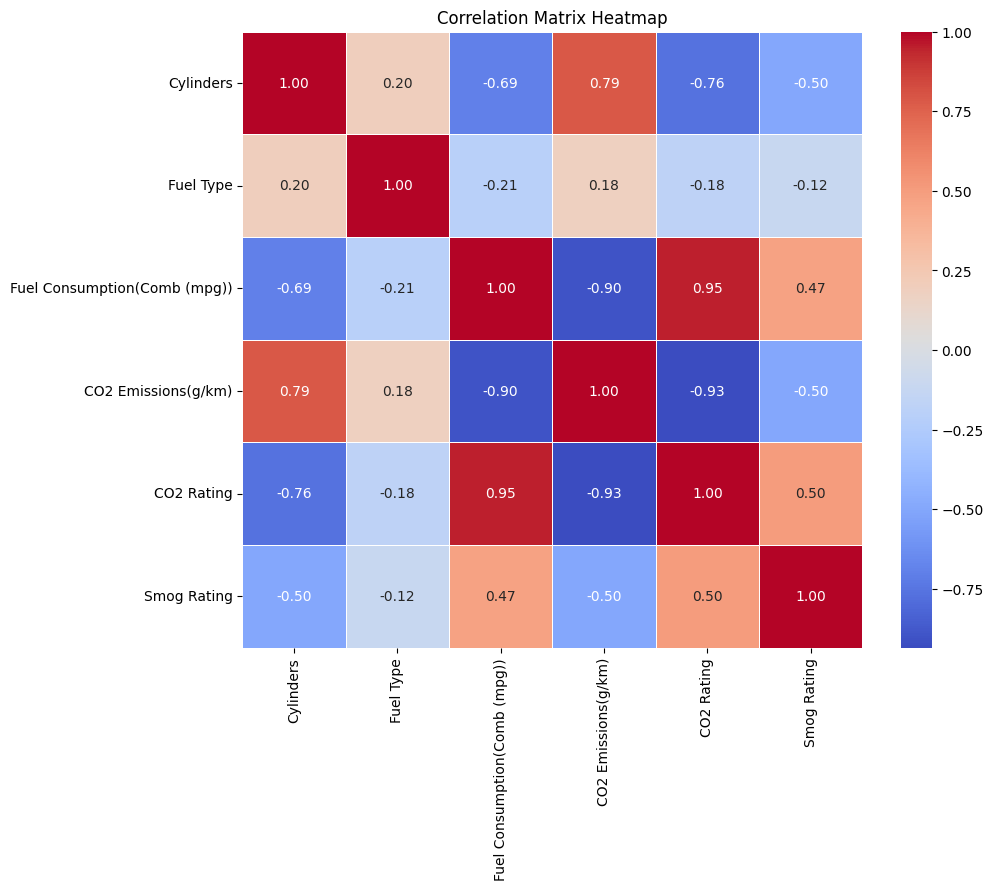

In [6]:
corr_matrix = vehicle_emission_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [7]:
X = vehicle_emission_data.drop(columns=['CO2 Rating'])
y = vehicle_emission_data['CO2 Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
predictions = rf_model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9894459102902374


In [11]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      0.88      0.94        17
           3       0.97      1.00      0.99        73
           4       1.00      1.00      1.00        92
           5       0.99      1.00      1.00       112
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        28
           8       1.00      0.67      0.80         3
           9       0.80      1.00      0.89         4

    accuracy                           0.99       379
   macro avg       0.97      0.91      0.93       379
weighted avg       0.99      0.99      0.99       379

